<a href="https://colab.research.google.com/github/Wolfteinter/Deep-Learning-Computer-Vision-CNN-OpenCV-YOLO-SSD-GANs/blob/master/Procesamiento_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Aplicacion de filtro Blur
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("image.jpg",cv2.IMREAD_UNCHANGED)
cv2_imshow(image)
cv2.waitKey()

kernel_3x3 = np.ones((3,3),np.float32)/9
blurred = cv2.filter2D(image,-1,kernel_3x3)
cv2_imshow(blurred)
cv2.waitKey()

kernel_7x7 = np.ones((7,7),np.float32)/49
blurred = cv2.filter2D(image,-1,kernel_7x7)
cv2_imshow(blurred)
cv2.waitKey()

cv2.destroyAllWindows()

In [0]:
#Binarizacion manual y automatica
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("Imagenes/page.jpg",0)
cv2_imshow(cv2.resize(image, (0,0), fx=0.2, fy=0.2)) 

ret,thresh1 = cv2.threshold(image,100,255,cv2.THRESH_BINARY)
cv2_imshow(cv2.resize(thresh1, (0,0), fx=0.2, fy=0.2))

_,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(cv2.resize(th2, (0,0), fx=0.2, fy=0.2))

In [0]:
#Erosion y dilatacion
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("Imagenes/page.jpg")
cv2_imshow(cv2.resize(image, (0,0), fx=0.2, fy=0.2))

kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(image,kernel,iterations = 1)
cv2_imshow(cv2.resize(erosion, (0,0), fx=0.2, fy=0.2))

dilation = cv2.dilate(image,kernel,iterations = 1)
cv2_imshow(cv2.resize(dilation, (0,0), fx=0.2, fy=0.2))


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("Imagenes/image.jpg",0)

sobel_x = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 5)
sobel_y = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 5)
cv2_imshow(image)
cv2_imshow(sobel_x)
cv2_imshow(sobel_y)

canny = cv2.Canny(image,100,170)
cv2_imshow(canny)

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("imagenes/hoja2.jpg")
cv2_imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray,20,200) 
cv2_imshow(edged)

result = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours, hierarchy = result if len(result) == 2 else result[1:3]
cv2.drawContours(image,contours,-1,(0,255,0),3)
cv2_imshow(image)

In [0]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("imagenes/figuras.png")
height, width = image.shape[0:2]
fondo = np.zeros((height,width,3))
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

edged = cv2.Canny(gray,30,200)
cv2_imshow(edged)

contours,hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[1:3]
cv2.drawContours(image,contours,-1,(0,255,0),3)
cv2_imshow(image)


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("imagenes/figuras.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray,30,200)
contours,hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[1:3]
cv2_imshow(image)
for i in contours:
  M = cv2.moments(i)
  x1 = int(M["m10"]/M["m00"])
  y1 = int(M["m01"]/M["m00"])
  #cv2.putText(image,"Figura",(x1,y1),cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),2)
  (x,y,w,h) = cv2.boundingRect(i)
  recortada = image[y:y+h,x:x+w]
  cv2_imshow(recortada)

In [0]:
#Aproximar contornos
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("imagenes/casa.png")
image_orig = image.copy()
cv2_imshow(image)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)
contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)[1:3]
for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(image_orig,(x,y),(x+w,y+h),(0,0,255),2)
  cv2_imshow(image_orig)

for c in contours:
  accuracy = 0.03 * cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,accuracy,True)
  cv2.drawContours(image,[approx],0,(0,255,0),2)
  cv2_imshow(image)

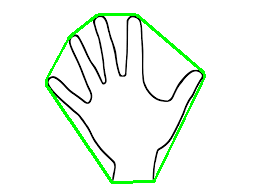

In [0]:
#convex hull 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("imagenes/mano.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,176,255,0)
contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)[1:3]
n = len(contours) -1
contours = sorted(contours,key=cv2.contourArea,reverse=False)[:n]

for c in contours:
  hull = cv2.convexHull(c)
  cv2.drawContours(image,[hull],0,(0,255,0),2)
  cv2_imshow(image)